In [2]:
from time import sleep
from phue import Bridge
import random
from numpy import zeros, ones

Find the bridge IP address

In [1]:
#!curl https://www.meethue.com/api/nupnp

In [4]:
import requests as req

In [5]:
IP = req.get('https://www.meethue.com/api/nupnp').json()[0]['internalipaddress']

API link: http://www.developers.meethue.com/philips-hue-api

In [10]:
b = Bridge(IP) # Enter bridge IP here.

#If running for the first time, press button on bridge and run with b.connect() uncommented
b.connect()


In [2]:
#b.get_light()

In [24]:
lights = b.lights_by_id

In [26]:
l = lights[1]

In [31]:
import time

Color loop on all lamps

In [97]:
for k, v in b.lights_by_id.items():
    try:
        v.effect = 'none'#'colorloop'
    except Exception as e:
        print(e)
    #time.sleep(0.1)

In [62]:
lnames = {l.name:l for l in lights}

In [94]:
for i in range(20):
    for i in range(19):
        v = lnames['P%d'%(i+1)]
        v.xy = c.rgbToCIE1931(1.0,0.0,0.0)
        v.brightness = 255
        #v.hue=1
        time.sleep(0.3)
        v.brightness = 0
        #v.hue=255
        v.xy = c.rgbToCIE1931(1.0,1.0,1.0)
        time.sleep(0.1)


    #time.sleep(0.01)

KeyboardInterrupt: 

In [98]:
for k, la in lnames.items():
    la.xy = c.rgbToCIE1931(1.0,1.0,1.0)
    la.brightness = 255
    #la.hue=1
    time.sleep(0.1)

In [41]:

lights = [b.lights_by_id[i] for i in b.lights_by_id.keys()]


c = 0.5 * ones([len(lights)])
d = 0.5 * ones([len(lights)])

for i in range(100):
    for i, light in enumerate(lights):
        #if i==4:
        light.brightness = 254
        light.transitiontime = 1
        c[i] = min(1., max(0., c[i] + (0.5-random.random()) * 0.1 ))
        d[i] = min(1., max(0., d[i] + (0.5-random.random()) * 0.1 ))
        light.xy = c[i], d[i]
        #print(i, c[i], d[i])
        sleep(0.011)
#
#stop

KeyboardInterrupt: 

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/home/pi/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/pi/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Plot all the colormaps in matplotlib

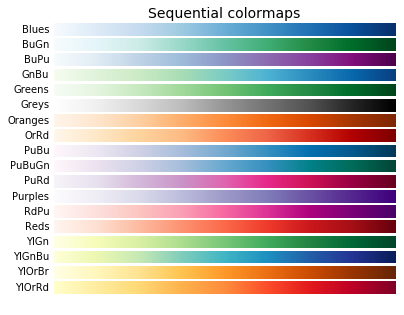

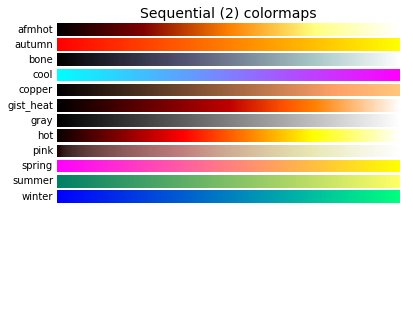

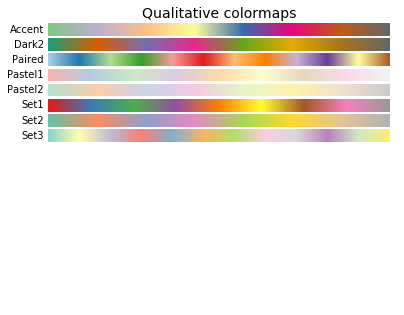

In [92]:
cmaps = [('Sequential',     ['Blues', 'BuGn', 'BuPu',
                             'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                             'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                             'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
         ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool', 'copper',
                             'gist_heat', 'gray', 'hot', 'pink',
                             'spring', 'summer', 'winter']),
#         ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
#                             'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
#                             'seismic']),
         ('Qualitative',    ['Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3']),
#         ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean', 'gist_stern',
#                             'brg', 'CMRmap', 'cubehelix',
#                             'gnuplot', 'gnuplot2', 'gist_ncar',
#                             'nipy_spectral', 'jet', 'rainbow',
#                             'gist_rainbow', 'hsv', 'flag', 'prism'])
        ]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

#### How to get a RGB froma value between 0.0 and 1.0:

In [93]:
cm = plt.get_cmap('hot')
#cm?
cm(0.1)

(0.29897110136087113, 0.0, 0.0, 1.0)

The `cm` command gives a tuple of 4 (R,G,B,A)

#### Conver RGB to Hue color code

Now lets convert that to CIE1931, the color code that Hue can understand. There is a python library that does that nicely: [rgb_cie](https://github.com/benknight/hue-python-rgb-converter/blob/master/rgb_cie.py). 

In [83]:
from rgb_cie import Converter
c = Converter()

In [84]:
R, G, B, A = cm(0.1)
X, Y = c.rgbToCIE1931(R,G,B)
print('(R:%2.2f, G:%2.2f, B:%2.2f) == (X:%2.2f, Y:%2.2f)'%(R,G,B,X,Y))

NameError: name 'cm' is not defined

A bit more compact

In [ ]:
c.rgbToCIE1931(*cm(0.1)[:3])

a nice little lambda function

In [17]:
mapxy = lambda colormap: lambda val: c.rgbToCIE1931(*plt.get_cmap(colormap)(val)[:3])

In [18]:
mapxy('hot')(0.1)

[0.64842722368721184, 0.330856101472778]

In [19]:
cmxy = mapxy('hot')
cmxy(0.1)

[0.64842722368721184, 0.330856101472778]

tqdm is just a neat function that show a progress bar in ipython

In [20]:
from tqdm import *

Now lets make a 

In [21]:
cmxy = mapxy('jet')
l = lights[4]
l.brightness = 254
l.transitiontime = 10.0
for i in tqdm(np.linspace(0.,1., 100)):
    for j, l in enumerate(lights):
        l.brightness = 254
        l.transitiontime = 1.0
        l.xy = cmxy(i)
        sleep(0.1)

|----------| 6/100   6% [elapsed: 00:26 left: 06:59,  0.22 iters/sec]

KeyboardInterrupt: 

In [22]:
for j, l in enumerate(lights):
    l.brightness = 254
    l.transitiontime = 0.0001
    l.xy = (1.0,1.0)
    sleep(2.0)
    l.xy = (0.0,0.0)
    l.brightness = 1

    

KeyboardInterrupt: 

In [28]:
lights

[<phue.Light object "Hue Lamp 1" at 0x1089b40f0>,
 <phue.Light object "Hue Lamp 2" at 0x1089b3c88>,
 <phue.Light object "Hue Lamp 3" at 0x1089b4208>,
 <phue.Light object "c4" at 0x1089b3eb8>,
 <phue.Light object "Hue Lamp 5" at 0x1089b3e48>,
 <phue.Light object "Hue Lamp 6" at 0x1089b4240>,
 <phue.Light object "Hue Lamp 7" at 0x1089b3cf8>,
 <phue.Light object "c2" at 0x1089b3da0>,
 <phue.Light object "Hue Lamp 9" at 0x1089b3cc0>,
 <phue.Light object "b2" at 0x1089b3f98>,
 <phue.Light object "Hue Lamp 11" at 0x1089b4048>,
 <phue.Light object "c3" at 0x10891b8d0>,
 <phue.Light object "Hue Lamp 13" at 0x1089b4320>,
 <phue.Light object "a1" at 0x1089b3ef0>,
 <phue.Light object "a3" at 0x1089b3fd0>,
 <phue.Light object "a2" at 0x1089b3e80>,
 <phue.Light object "a4" at 0x1089b4358>,
 <phue.Light object "b3" at 0x1089b4198>,
 <phue.Light object "c1" at 0x1089b3d68>,
 <phue.Light object "b1" at 0x10891b5f8>,
 <phue.Light object "b4" at 0x1089b4160>,
 <phue.Light object "Hue Lamp 22" at 0x1089b

In [92]:
for ln in ['a1', 'a2', 'a3', 'a4', 'b4', 'b3', 'b2', 'b1','c1', 'c2', 'c3', 'c4']:
    for l in lights:
        if l.name == ln:
            l.transitiontime = 0.0001
            l.saturation = 254
            l.brightness = 254
            l.colortemp = 343
            l.hue = 15327
            sleep(0.5)
            #l.xy = (0.0,0.0)
            #l.brightness = 1


In [51]:
def f(string):
    return lights[[l.name for l in lights].index(string)]

In [89]:
l = f('c2')
l.saturation = 254
l.brightness = 254
l.colortemp = 343
l.xy = (1.0,1.0)
l.hue = 15327


In [58]:
f('c4').__dict__

{'_alert': None,
 '_brightness': 1,
 '_colormode': None,
 '_colortemp': None,
 '_effect': None,
 '_hue': None,
 '_name': 'c4',
 '_on': None,
 '_reset_bri_after_on': None,
 '_saturation': 254,
 '_xy': (0.0, 0.0),
 'bridge': <phue.Bridge at 0x10891b898>,
 'light_id': 4,
 'transitiontime': 0.0001}

In [64]:
f('a4').__dict__

{'_alert': None,
 '_brightness': 1,
 '_colormode': None,
 '_colortemp': None,
 '_effect': None,
 '_hue': None,
 '_name': 'a4',
 '_on': None,
 '_reset_bri_after_on': None,
 '_saturation': 254,
 '_xy': (0.0, 0.0),
 'bridge': <phue.Bridge at 0x10891b898>,
 'light_id': 17,
 'transitiontime': 0.0001}

In [61]:
b.name

'Philips hue'

In [62]:
l.name

'Hue Lamp 8'

In [65]:
lights[4].on = True

In [66]:
l = lights[4]

In [70]:
l.effect = 'none'

In [113]:
cmxy(0.2)

[0.18336011781119052, 0.072301265236468626]

In [30]:
for i, l in enumerate(lights):
    l.brightness = 254
    l.transitiontime = 0.5
    l.xy = cmxy((0.001+i)/len(lights))    
    l.effect = 'none' #colorloop |
    sleep(1.0)

## RESTful fun

In [22]:
get = lambda str_:req.get('http://'+IP+'/api/'+b.username+'/'+str_).json()
post = lambda str_, data:req.post('http://'+IP+'/api/'+b.username+'/'+str_, data).json()

Search for new lights

In [23]:
post('lights',{})

[{'success': {'/lights': 'Searching for new devices'}}]

List the new lights

In [24]:
get('lights/new')

{'lastscan': 'active'}

In [25]:
print('now there are %d lights'%(len(get('lights'))))

now there are 27 lights


Which one can be found?

In [31]:
for k,v in get('lights').items():
    print(v['name'], v['state']['reachable'])

Hue Lamp 20 False
Hue Lamp 7 False
Hue Lamp 14 False
Hue Lamp 17 False
Hue Lamp 6 False
Hue Lamp 5 True
Hue Lamp 13 False
Hue Lamp 25 False
Hue Lamp 24 False
Hue Lamp 1 True
Hue Lamp 27 False
Hue Lamp 21 False
Hue Lamp 18 False
Hue Lamp 23 False
Hue Lamp 4 True
Hue Lamp 26 False
Hue Lamp 9 True
Hue Lamp 11 False
Hue Lamp 12 False
Hue Lamp 2 True
Hue Lamp 16 False
Hue Lamp 15 False
Hue Lamp 8 False
Hue Lamp 10 False
Hue Lamp 19 False
Hue Lamp 22 False
Hue Lamp 3 False


In [28]:
li = get('lights')

In [160]:
li['1']['state']['reachable']

False